## Trading project

### Crypto pair trading

Steve ENYEGUE 20181108

In [1]:
import yfinance as yf
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import KMeans


We load data for several cryptocurrencies:

In [27]:
tickers = ['BTC-USD','BCH-USD','LTC-USD','XMR-USD','ETH-USD','DASH-USD','BAT-USD','BNB-USD','DOGE-USD','LINK-USD','ADA-USD','XRP-USD','XMR-USD','CHZ-USD','EOS-USD','NEO-USD']

crypto_df = yf.download(tickers, start="2021-05-01", end="2021-05-21")['Adj Close']


[*********************100%***********************]  15 of 15 completed


Let's display the closing prices of the cryptocurrencies

In [28]:
crypto_df.head()

,ADA-USD,BAT-USD,BCH-USD,BNB-USD,BTC-USD,CHZ-USD,DASH-USD,DOGE-USD,EOS-USD,ETH-USD,LINK-USD,LTC-USD,NEO-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,
2021-04-30,1.352449,1.263170,993.425659,624.080566,57750.175781,0.569856,319.170868,0.337561,6.443227,2773.207031,38.128506,271.167084,97.058350,421.890839,1.591674
2021-05-01,1.353071,1.270628,1005.080078,619.347229,57828.050781,0.553664,322.046509,0.392987,6.614103,2945.892822,41.116261,276.833527,102.262810,426.279114,1.651025
2021-05-02,1.326812,1.256546,974.655457,622.101013,56631.078125,0.531485,315.036316,0.376046,6.528201,2952.056152,39.504856,269.104370,106.497284,405.129242,1.562641
2021-05-03,1.362030,1.292276,1017.299988,675.684082,57200.292969,0.524162,342.016449,0.441707,6.815497,3431.086182,42.059807,294.704010,107.084518,411.840698,1.555995
2021-05-04,1.274111,1.171853,955.182434,611.200317,53333.539062,0.488008,361.725464,0.541334,6.367040,3253.629395,45.686138,306.234497,96.698502,380.206482,1.392376


In [29]:
crypto_df_norm = crypto_df.divide(crypto_df.iloc[0])


Now that we have all the cryptos in one dataframe, let's visualize the currencies' relative efficiency. To do this, we divide the entire data frame by the first row, normalizing it so that for all currencies, the first entry will be 1 and subsequent cells inside columns will reflect percentage gains:

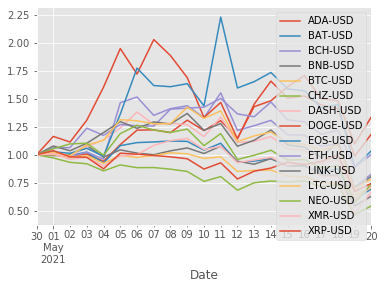

In [30]:
crypto_df_norm.plot()

Last year has been very volatile because of COVID-19. In order to do truly meaningful analysis, we need to work with percentage returns:

In [31]:
import numpy as np

crypto_pct_returns = (crypto_df / crypto_df.shift(1)) - 1
crypto_pct_returns = crypto_pct_returns.dropna()
crypto_pct_returns.head(9)

,ADA-USD,BAT-USD,BCH-USD,BNB-USD,BTC-USD,CHZ-USD,DASH-USD,DOGE-USD,EOS-USD,ETH-USD,LINK-USD,LTC-USD,NEO-USD,XMR-USD,XRP-USD
Date,,,,,,,,,,,,,,,
2021-05-01,0.000460,0.005904,0.011732,-0.007584,0.001348,-0.028414,0.009010,0.164196,0.026520,0.062269,0.078360,0.020896,0.053622,0.010401,0.037289
2021-05-02,-0.019407,-0.011083,-0.030271,0.004446,-0.020699,-0.040059,-0.021768,-0.043109,-0.012988,0.002092,-0.039191,-0.027920,0.041408,-0.049615,-0.053533
2021-05-03,0.026543,0.028436,0.043753,0.086132,0.010051,-0.013779,0.085641,0.174608,0.044008,0.162270,0.064674,0.095129,0.005514,0.016566,-0.004253
2021-05-04,-0.064550,-0.093187,-0.061061,-0.095435,-0.067600,-0.068973,0.057626,0.225552,-0.065800,-0.051720,0.086218,0.039126,-0.096989,-0.076812,-0.105154
2021-05-05,0.158085,0.165868,0.523201,0.066202,0.076696,0.062072,0.093833,0.214837,0.379691,0.082724,0.081932,0.162629,0.193372,0.097322,0.159537
2021-05-06,0.118327,0.025122,0.034937,-0.028208,-0.017893,-0.026951,0.114287,-0.116827,0.301405,-0.009056,-0.046569,-0.007097,0.063140,0.012724,-0.008629
2021-05-07,0.002018,0.005294,-0.107931,-0.013765,0.017020,0.001300,-0.080345,0.179016,-0.088004,-0.001762,0.046338,-0.020528,-0.033576,0.081955,-0.011762
2021-05-08,-0.020502,0.007695,0.044013,0.034484,0.025235,-0.016315,0.009188,-0.070589,-0.006431,0.119929,-0.014242,0.000333,-0.017806,0.040092,-0.012111
2021-05-09,0.093241,-0.003182,0.018655,0.024962,-0.009718,-0.023390,-0.010237,-0.104281,0.016606,0.006713,0.073850,0.115721,0.024542,0.017058,-0.017474


We want to inspect the correlations of the assets’ returns. Let's plot the correlation matrix with pandas library

In [32]:
corr_matrix = crypto_pct_returns.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,ADA-USD,BAT-USD,BCH-USD,BNB-USD,BTC-USD,CHZ-USD,DASH-USD,DOGE-USD,EOS-USD,ETH-USD,LINK-USD,LTC-USD,NEO-USD,XMR-USD,XRP-USD
ADA-USD,1.000000,0.814710,0.710210,0.741688,0.781014,0.881732,0.752265,0.612437,0.682101,0.571465,0.669195,0.760511,0.837985,0.797965,0.809266
BAT-USD,0.814710,1.000000,0.889845,0.935026,0.937211,0.925455,0.889714,0.662819,0.801950,0.849028,0.847135,0.909420,0.967688,0.896940,0.900960
BCH-USD,0.710210,0.889845,1.000000,0.762939,0.830161,0.739351,0.783378,0.596140,0.840956,0.709895,0.681046,0.832076,0.852758,0.681788,0.801520
BNB-USD,0.741688,0.935026,0.762939,1.000000,0.889327,0.892459,0.880806,0.606919,0.701310,0.935020,0.836656,0.884529,0.909082,0.903001,0.800750
BTC-USD,0.781014,0.937211,0.830161,0.889327,1.000000,0.858125,0.800640,0.689810,0.712844,0.835564,0.779071,0.842756,0.919355,0.895004,0.798819
CHZ-USD,0.881732,0.925455,0.739351,0.892459,0.858125,1.000000,0.856969,0.721056,0.694198,0.753125,0.860099,0.866298,0.912577,0.906855,0.919878
DASH-USD,0.752265,0.889714,0.783378,0.880806,0.800640,0.856969,1.000000,0.667391,0.838485,0.827452,0.856172,0.891338,0.896450,0.827698,0.757351
DOGE-USD,0.612437,0.662819,0.596140,0.606919,0.689810,0.721056,0.667391,1.000000,0.499073,0.590756,0.788385,0.730549,0.659366,0.638240,0.655853
EOS-USD,0.682101,0.801950,0.840956,0.701310,0.712844,0.694198,0.838485,0.499073,1.000000,0.611634,0.601072,0.721138,0.802499,0.597894,0.717027
ETH-USD,0.571465,0.849028,0.709895,0.935020,0.835564,0.753125,0.827452,0.590756,0.611634,1.000000,0.802497,0.824540,0.791983,0.795220,0.674650


From the matrix, we can see that the cryptocurrencies tend to mainly move together, at least against the dollar, as confirmed by all correlation values being over 0. 

From here, we may wish to analyse a relationship between two highly correlated currencies. From the correlation matrix it looks like Bitcoin (BTC) and Monero (XMR) are highly correlated. We can double check the correlation by running:

In [11]:
corr_matrix['BTC-USD']['XMR-USD']


0.7857860465499931

In [12]:
### XMR got removed from Bittrex because of American policy ###

Let's select the both cryptocurrencies we'll analyze

In [21]:
pair_df = crypto_df[['BTC-USD','XMR-USD']]

In [22]:
pair_df.pct_change().describe()

,BTC-USD,XMR-USD
count,362.000000,362.000000
mean,0.004633,0.004619
std,0.037918,0.046221
min,-0.371695,-0.389967
25%,-0.009387,-0.019185
50%,0.002848,0.007308
75%,0.017956,0.031672
max,0.181878,0.151187


Both assets are very volatile, XMR more, we can plot that.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A4FCF1E3A0>,
      dtype=object)

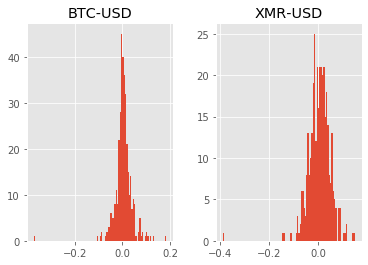

In [23]:
pair_df.pct_change().hist(bins=100)

We need to change the data type to apply some methods

In [33]:
pair_numpy = pair_df.pct_change().dropna().to_numpy()


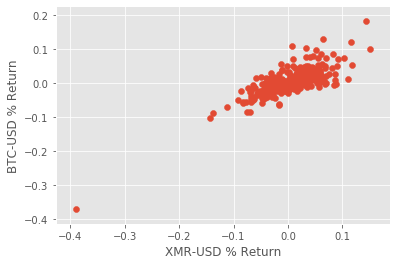

In [34]:
plt.figure(figsize=(6, 4))
plt.scatter(pair_numpy[:,1],pair_numpy[:,0])
plt.xlabel('XMR-USD % Return')
plt.ylabel('BTC-USD % Return')
plt.show()


Relationship lools linear for most points.
Further breakdokn of the relationship between BTC and XMR can be obtained by Linear Regression

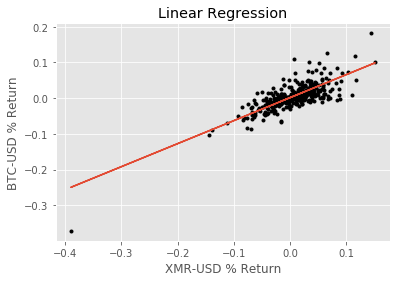

In [35]:
plt.figure()

m, b = np.polyfit(pair_numpy[:,1],pair_numpy[:,0],1) #polynomial fit function that accepts the data set and returns an array of coefficients that minimizes the squared error
plt.grid(True)
plt.plot(pair_numpy[:,1],pair_numpy[:,0], 'k.')
plt.plot(pair_numpy[:,1], m*pair_numpy[:,1] + b, '-') #Linear function form is f(x)=ax+b
plt.title('Linear Regression')
plt.xlabel('XMR-USD % Return')
plt.ylabel('BTC-USD % Return')

plt.show()

Basically, we are asking the Python interpreter to multiply each value of XMR returns by the slope coefficient we obtained from regression and put them into a single list

Some cryptocurrencies traders prefer to trade their cryptos in BTC and not in USD, in order to the increase amount of bitcoin they are worth. We'll follow this strategy, we will test a strategy on XMR-BTC crypto pair, in order to increase our bitcoin balance.

In [76]:
tickers = ['XMR-BTC']
xmr_btc_df = yf.download(tickers, start="2020-01-01", end="2021-01-01")


[*********************100%***********************]  1 of 1 completed


In [86]:
xmr_close = pd.DataFrame(xmr_btc_df.Close)

We apply the Simple Moving Average crossover strategy with 9 and 21 minute lookback periods.

In [103]:
xmr_close['SMA_9'] = xmr_close.Close.rolling(9).mean().shift()
xmr_close['SMA_21'] = xmr_close.Close.rolling(21).mean()



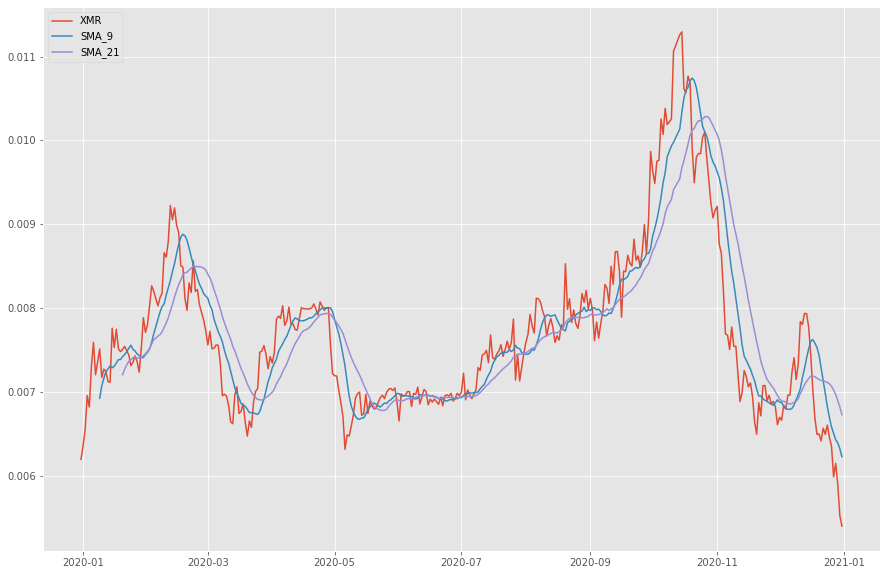

In [104]:
plt.figure(figsize=(15,10))
plt.grid(True)
plt.plot(xmr_close['Close'],label='XMR')
plt.plot(xmr_close['SMA_9'], label='SMA_9')
plt.plot(xmr_close['SMA_21'], label='SMA_21')
plt.legend(loc=2)

 9-minute average reacts to recent changes quicker than the 21-minute one. The SMA crossover strategy logic is as follows:
- BUY if Leading SMA is above Lagging SMA by some threshold.
- SELL if Leading SMA is below Lagging SMA by some threshold.

Threshold will be set by default as 2.5% of the current price.

In [125]:
def test_sma(xmr_close, lead, lag, pc_thresh = 0.025):
    sma_df = xmr_close.copy()
    sma_df['lead'] = xmr_close.Close.rolling(lead).mean()
    sma_df['lag'] = xmr_close.Close.rolling(lag).mean()
    sma_df.dropna(inplace = True)
    sma_df['lead-lag'] = sma_df['lead'] - sma_df['lag']
    sma_df['pc_diff'] = sma_df['lead-lag'] / sma_df['Close']
    sma_df['regime'] = np.where(sma_df['pc_diff'] > pc_thresh, 1, 0)
    sma_df['regime'] = np.where(sma_df['pc_diff'] < -pc_thresh, -1, sma_df['regime'])
    sma_df['Market'] = np.log(xmr_close.Close / xmr_close.Close.shift(1))
    sma_df['Strategy'] = sma_df['regime'].shift(1) * sma_df['Market']
    sma_df[['Market','Strategy']] = sma_df[['Market','Strategy']].cumsum().apply(np.exp)
    return sma_df

Let’s test the function:

In [126]:
sma_df = test_sma(xmr_close, 9, 21).dropna()


To see whether we outperformed the underlying market, we can take the last values on Market and Strategy columns by using index lock:

In [127]:
sma_df[['Market','Strategy']].iloc[-1]


Market      0.721791
Strategy    1.710883
Name: 2020-12-31 00:00:00, dtype: float64

Our strategy outperformed the market by 2.5 times.

When we plot the series of regime we see we mostly did long trades.


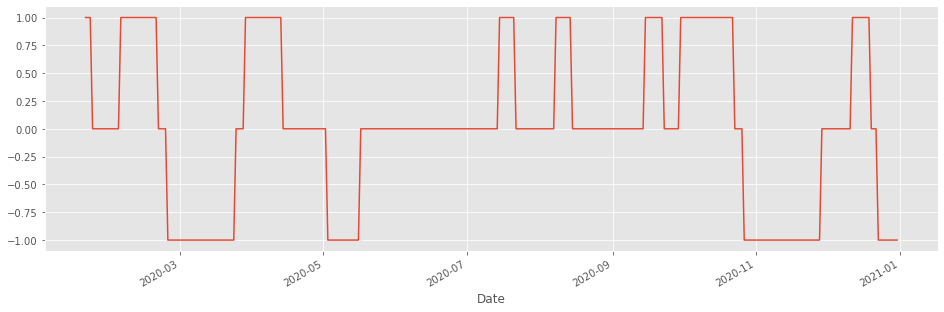

In [128]:
sma_df['regime'].plot(figsize=(16,5))

Let's plot our strategy against the market series.

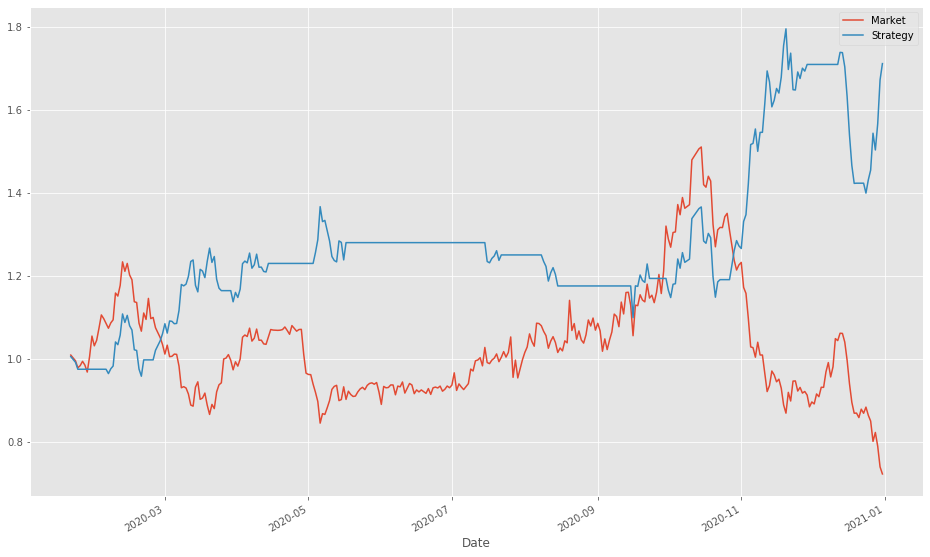

In [129]:
sma_df[['Market','Strategy']].plot(figsize = (16,10))


We can see our strategy outperform the market for most of the time